In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [24]:
data = pd.read_csv('M1_final.csv')

# Drop cols with useless data for this analysis
data = data.drop(columns=['TAIL_NUM'])
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,CHS,-1,124,636,324,323,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,FLL,40,181,1069,301,341,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,MCO,-2,168,944,345,343,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,ATL,-4,139,760,360,356,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,ORH,2,57,150,1370,1372,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,BOS,2,75,187,1390,1392,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,SEA,283,392,2422,1125,1408,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,SJU,5,224,1598,1417,1422,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,28820.0,7.894240,4.991723,1.0,1.00,11.00,12.00,12.00
DAY_OF_MONTH,28820.0,16.021096,8.750179,1.0,8.00,16.00,24.00,31.00
DAY_OF_WEEK,28820.0,4.008952,1.985230,1.0,2.00,4.00,6.00,7.00
DEP_DELAY,28820.0,6.374983,38.735144,-22.0,-6.00,-3.00,2.00,1276.00
CRS_ELAPSED_TIME,28820.0,225.288203,119.482417,57.0,124.00,188.00,365.00,697.00
DISTANCE,28820.0,1267.746079,889.343246,94.0,483.00,1029.00,2248.00,4983.00
CRS_DEP_M,28820.0,831.003851,299.398525,301.0,545.00,856.00,1095.00,1439.00
DEP_TIME_M,28820.0,828.934698,305.864103,1.0,542.00,854.00,1097.00,1440.00
CRS_ARR_M,28820.0,910.874289,345.411743,1.0,667.00,918.00,1193.00,1439.00
Temperature,28820.0,41.489833,8.043533,17.0,36.00,42.00,47.00,68.00


In [26]:
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [27]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


/var/folders/cv/swyglqyx1tlc_6vc0p615fhr0000gn/T/ipykernel_74917/2825666619.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

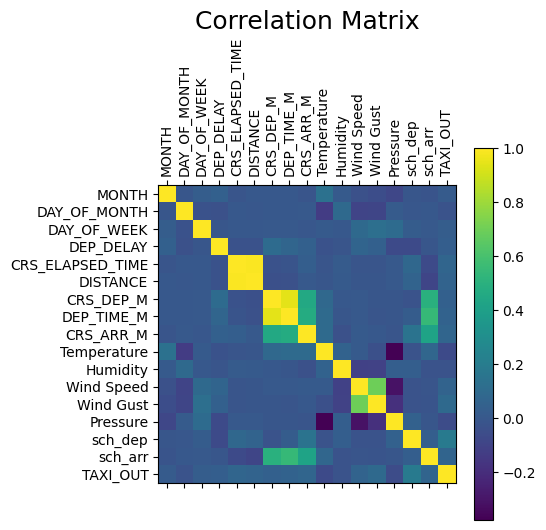

In [28]:
plt.figure()
plt.matshow(corr_matrix)
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()

plt.tight_layout()
plt.savefig('correlation_matrix.jpeg')

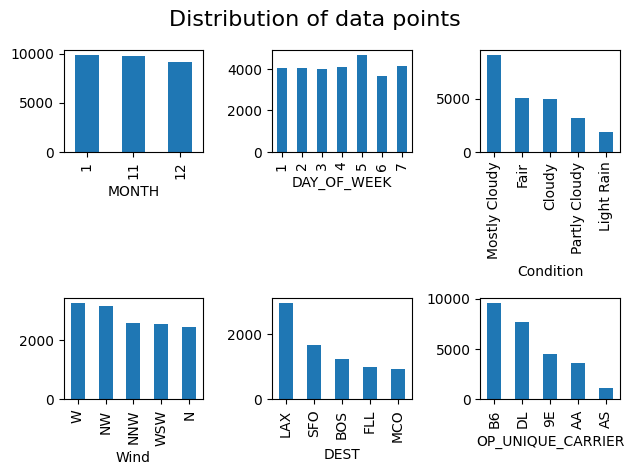

In [29]:
fig, ax = plt.subplots(2,3)

fig.suptitle('Distribution of data points', fontsize=16)

data_month_taxi_size = data.groupby('MONTH').size()
data_month_taxi_size.plot(kind='bar', ax=ax[0][0])

data_week_of_day = data.groupby('DAY_OF_WEEK').size()
data_week_of_day.plot(kind='bar', ax=ax[0][1])

data_wind = data.groupby('Wind').size()
data_wind_top10 = data_wind.sort_values(ascending=False)[:5]
data_wind_top10.plot(kind='bar', ax=ax[1][0])

data_dest = data.groupby('DEST').size()
data_dest_top10 = data_dest.sort_values(ascending=False)[:5]
data_dest_top10.plot(kind='bar', ax=ax[1][1])

data_condition = data.groupby('Condition').size()
data_condition_top10 = data_condition.sort_values(ascending=False)[:5]
data_condition_top10.plot(kind='bar', ax=ax[0][2])

data_carrier = data.groupby('OP_UNIQUE_CARRIER').size()
data_carrier_top10 = data_carrier.sort_values(ascending=False)[:5]
data_carrier_top10.plot(kind='bar', ax=ax[1][2])

plt.tight_layout()
plt.savefig('distribution_of_data_points.jpeg')

In [43]:
## Modelling

# taxi-out time
y = data['TAXI_OUT'].values.reshape(-1,1)
y

array([[14],
       [15],
       [22],
       ...,
       [21],
       [13],
       [15]], shape=(28820, 1))

In [31]:
features = ['DEP_DELAY', 'CRS_ELAPSED_TIME','CRS_DEP_M','DEP_TIME_M','CRS_ARR_M','Temperature','Dew Point','Humidity','Wind Speed','Pressure','sch_dep', 'sch_arr']
X = data[features]
X

,DEP_DELAY,CRS_ELAPSED_TIME,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Pressure,sch_dep,sch_arr
0,-1,124,324,323,448,48,34,58,25,29.86,9,17
1,-7,371,340,333,531,48,34,58,25,29.86,9,17
2,40,181,301,341,482,48,34,58,25,29.86,9,17
3,-2,168,345,343,513,48,34,58,25,29.86,9,17
4,-4,139,360,356,499,46,32,58,24,29.91,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
28815,2,57,1370,1372,1427,39,38,96,6,30.18,20,32
28816,2,75,1390,1392,25,39,38,96,6,30.18,19,23
28817,283,392,1125,1408,1337,39,38,96,6,30.18,19,23
28818,5,224,1417,1422,261,39,38,96,6,30.18,19,23


In [32]:
lin_reg = LinearRegression()

In [33]:
# Build model for taxi-out time vs departure delay
X_dep_delay = data.iloc[:, 5].values.reshape(-1,1)

train_X_dep_delay, test_X_dep_delay, train_y_dep_delay, test_y_dep_delay = train_test_split(X_dep_delay, y, test_size=0.2, random_state=32)

lin_reg_dep_delay = LinearRegression()
lin_reg_dep_delay.fit(X_dep_delay, y)

LinearRegression()

In [34]:
pred_y_dep_delay = lin_reg_dep_delay.predict(test_X_dep_delay)
data_pred_dep_delay = pd.DataFrame({'Actual': test_y_dep_delay.flatten(), 'Predicted': pred_y_dep_delay.flatten()})
# data_pred_dep_delay

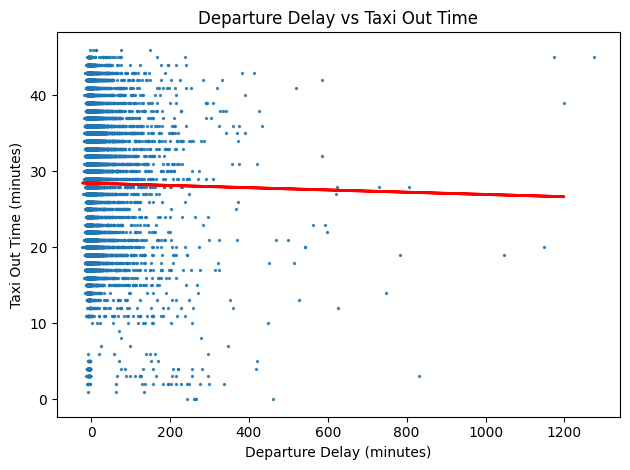

In [35]:
fig, ax = plt.subplots()
ax.scatter(X_dep_delay, y, s =2, alpha=0.8)
ax.plot(test_X_dep_delay, pred_y_dep_delay, color='red', linewidth=2)
ax.set_title('Departure Delay vs Taxi Out Time')
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('Taxi Out Time (minutes)')

plt.tight_layout()

plt.savefig('dep_delay_vs_taxi_out_time.jpeg')

In [36]:
# Build model for taxi-out time vs wind speed
X_ws = data['Wind Speed'].values.reshape(-1,1)

train_X_ws, test_X_ws, train_y_ws, test_y_ws = train_test_split(X_ws, y, test_size=0.2, random_state=32)
lin_reg_ws = LinearRegression()
lin_reg_ws.fit(train_X_ws, train_y_ws)

LinearRegression()

In [37]:
pred_y_ws = lin_reg_ws.predict(test_X_ws)

data_pred_ws = pd.DataFrame({'Actual': test_y_ws.flatten(), 'Predicted': pred_y_ws.flatten()})


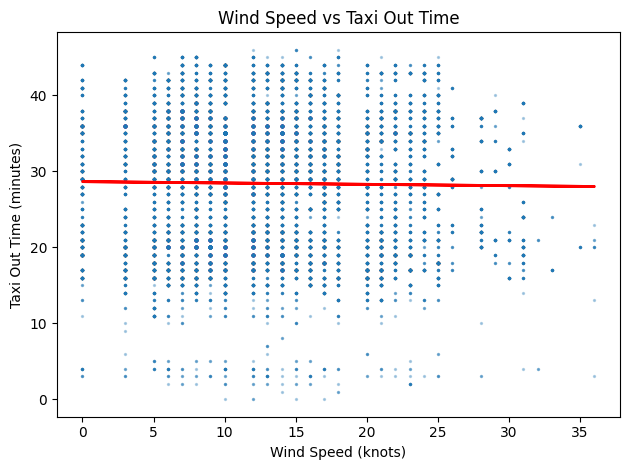

In [38]:
fig, ax = plt.subplots()
ax.scatter(X_ws, y, s =2, alpha=0.3)
ax.plot(test_X_ws, pred_y_ws, color='red', linewidth=2)
ax.set_title('Wind Speed vs Taxi Out Time')
ax.set_xlabel('Wind Speed (knots)')
ax.set_ylabel('Taxi Out Time (minutes)')

plt.tight_layout()

plt.savefig('wind_speed_vs_taxi_out_time.jpeg')

In [39]:
X = data.

SyntaxError: invalid syntax (1451725882.py, line 1)